In [32]:
%reset -f
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from tabulate import tabulate
from matplotlib import pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
df = pd.read_csv('dataset.csv')
Nobs=df['ID'].count()
df['const']=np.ones((Nobs,1))
df.rename(columns={'Fast charge (min)':'ChargeTime'},inplace=True)
data = df[df['Market share'] != 0]
data.head(20)

,ID,year,Market share,Manufacturer,Model,Range,Price,HP,ChargeTime,Type,Segment,Country,Count,const
8,1,2021,0.010319,Aiways,U5,400,284621.700,201,34,SUV,C,CH,257,1.0
9,1,2022,0.005938,Aiways,U5,400,313681.829,201,34,SUV,C,CH,183,1.0
10,1,2023,0.002822,Aiways,U5,400,264524.000,201,34,SUV,C,CH,177,1.0
21,2,2023,0.000048,Aiways,U6,405,360638.000,214,34,SUV,C,CH,3,1.0
28,3,2019,0.040217,Audi,e-tron,375,979704.475,402,17,SUV,F,DE,222,1.0
29,3,2020,0.034512,Audi,e-tron,375,890101.410,402,17,SUV,F,DE,491,1.0
30,3,2021,0.010440,Audi,e-tron,375,800035.193,402,17,SUV,F,DE,260,1.0
31,3,2022,0.017456,Audi,e-tron,375,789723.656,402,17,SUV,F,DE,538,1.0
32,3,2023,0.001084,Audi,e-tron,375,673037.728,402,17,SUV,F,DE,68,1.0
41,4,2021,0.003373,Audi,e-tron GT,472,1278896.110,522,17,Sedan,F,DE,84,1.0


In [34]:
# Calculate the total count for all models
total_count_all_models = data['Count'].sum()

# Group by Model and sum the counts
model_counts = data.groupby('Model')['Count'].sum()

# Calculate the market share proportion
data['Market share proportion'] = data['Count'] / total_count_all_models

# Print the modified DataFrame
print(data)

       ID  year  Market share Manufacturer   Model  Range       Price   HP  \
8       1  2021      0.010319       Aiways      U5    400  284621.700  201   
9       1  2022      0.005938       Aiways      U5    400  313681.829  201   
10      1  2023      0.002822       Aiways      U5    400  264524.000  201   
21      2  2023      0.000048       Aiways      U6    405  360638.000  214   
28      3  2019      0.040217         Audi  e-tron    375  979704.475  402   
...   ...   ...           ...          ...     ...    ...         ...  ...   
1174  189  2023      0.000064        Volvo    EX30    475  368245.000  268   
1183  190  2021      0.014575        Volvo    XC40    457  462060.600  402   
1184  190  2022      0.033094        Volvo    XC40    457  416263.400  402   
1185  190  2023      0.031327        Volvo    XC40    457  439266.600  402   
1196  192  2023      0.000128        Voyah    Free    500  504768.500  482   

      ChargeTime Type Segment Country  Count  const  Market sha

/var/folders/84/nl1t_q050914klynvps92vkc0000gn/T/ipykernel_29229/3209461368.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Market share proportion'] = data['Count'] / total_count_all_models


# Statistics

## Average per year

In [35]:
# Group the data by year
grouped_data = data.groupby('year')

# Calculate the required statistics
desc_stats = grouped_data.agg({
    'Model': pd.Series.nunique,  # number of unique models
    'Count': 'sum',  # sum of count
    'Price': 'mean',  # average price
    'Range': 'mean',  # average range
    'HP': 'mean',  # average hp
    'ChargeTime': 'mean'  # average charge time
})

# Rename the columns
desc_stats.columns = ['Number of Unique Models', 'Sum of Count', 'Average Price', 'Average Range', 'Average HP', 'Average Charge Time']

# Print the descriptive statistics table
print(desc_stats)


      Number of Unique Models  Sum of Count  Average Price  Average Range  \
year                                                                        
2013                        6           447  296770.419877     330.000000   
2014                        6          1485  310058.947710     347.166667   
2015                        7          3942  321165.598038     361.857143   
2016                        8          1190  458294.975000     382.750000   
2017                        9           650  453467.325000     374.666667   
2018                       11          1467  475000.854545     389.090909   
2019                       16          5464  481717.118813     386.500000   
2020                       33         14158  423285.467182     359.333333   
2021                       57         24775  445642.696800     384.438596   
2022                       81         30621  507474.479558     402.222222   
2023                      100         61885  552423.712756     421.740000   

### Total average

In [36]:
# Calculate the required statistics
total_unique_models = data['Model'].nunique()
total_count = data['Count'].sum()
average_sales_per_model = total_count / total_unique_models
average_price = data['Price'].mean()
average_range = data['Range'].mean()
average_hp = data['HP'].mean()
average_charge_time = data['ChargeTime'].mean()

# Create the DataFrame
desc_stats = pd.DataFrame({
    'Total Unique Models': [total_unique_models],
    'Total Count': [total_count],
    'Average Sales per model': [average_sales_per_model],
    'Average Price': [average_price],
    'Average Range': [average_range],
    'Average HP': [average_hp],
    'Average Charge Time': [average_charge_time]
})

# Print the descriptive statistics table
print(desc_stats)


   Total Unique Models  Total Count  Average Sales per model  Average Price  \
0                  107       146084              1365.271028  485889.349318   

   Average Range  Average HP  Average Charge Time  
0     395.266467  252.751497            34.161677  


## Sales-weighted average

In [37]:
# Group the data by year
grouped_data = data.groupby('year')

# Calculate the required statistics
desc_stats = grouped_data.agg({
    'Model': pd.Series.nunique,  # number of unique models
    'Count': ['sum'],  # sum of sales per model
    'Price': lambda x: np.average(x, weights=data.loc[x.index, 'Count']),  # sales-weighted average price
    'Range': lambda x: np.average(x, weights=data.loc[x.index, 'Count']),  # sales-weighted average range
    'HP': lambda x: np.average(x, weights=data.loc[x.index, 'Count']),  # sales-weighted average HP
    'ChargeTime': lambda x: np.average(x, weights=data.loc[x.index, 'Count'])  # sales-weighted average charge time
})

# Rename the columns
desc_stats.columns = ['Number of Unique Models', 'Sum of Count', 
                      'Sales Weighted Average Price', 'Sales Weighted Average Range', 
                      'Sales Weighted Average HP', 'Sales Weighted Average Charge Time']

# Print the descriptive statistics table
print(desc_stats)

      Number of Unique Models  Sum of Count  Sales Weighted Average Price  \
year                                                                        
2013                        6           447                 348373.092344   
2014                        6          1485                 363124.700251   
2015                        7          3942                 573531.215995   
2016                        8          1190                 375604.406050   
2017                        9           650                 383234.055462   
2018                       11          1467                 328732.444649   
2019                       16          5464                 432898.014253   
2020                       33         14158                 421266.359033   
2021                       57         24775                 401596.162755   
2022                       81         30621                 467262.704107   
2023                      100         61885                 639583.770887   

### Total sales-weighted mean

In [38]:
# Calculate the total sales-weighted means
total_sales_weighted_mean_price = np.average(data['Price'], weights=data['Count'])
total_sales_weighted_mean_range = np.average(data['Range'], weights=data['Count'])
total_sales_weighted_mean_hp = np.average(data['HP'], weights=data['Count'])
total_sales_weighted_mean_charge_time = np.average(data['ChargeTime'], weights=data['Count'])

# Print the results
print("Total Sales Weighted Mean Price:", total_sales_weighted_mean_price)
print("Total Sales Weighted Mean Range:", total_sales_weighted_mean_range)
print("Total Sales Weighted Mean HP:", total_sales_weighted_mean_hp)
print("Total Sales Weighted Mean Charge Time:", total_sales_weighted_mean_charge_time)


Total Sales Weighted Mean Price: 522316.10989774315
Total Sales Weighted Mean Range: 464.69727690917557
Total Sales Weighted Mean HP: 300.61758987979516
Total Sales Weighted Mean Charge Time: 30.611969825579802


# Graphs

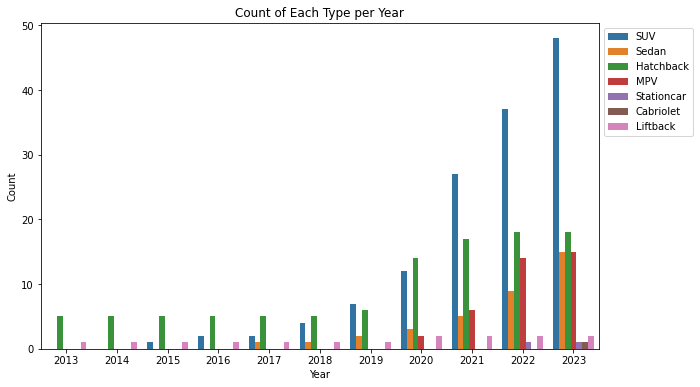

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='Type', data=data)
plt.title('Count of Each Type per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


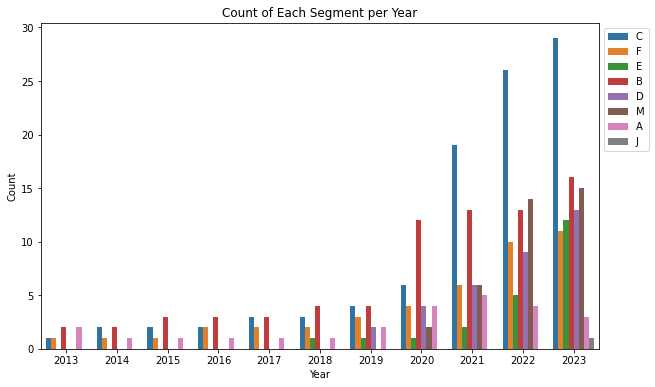

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='Segment', data=data)
plt.title('Count of Each Segment per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


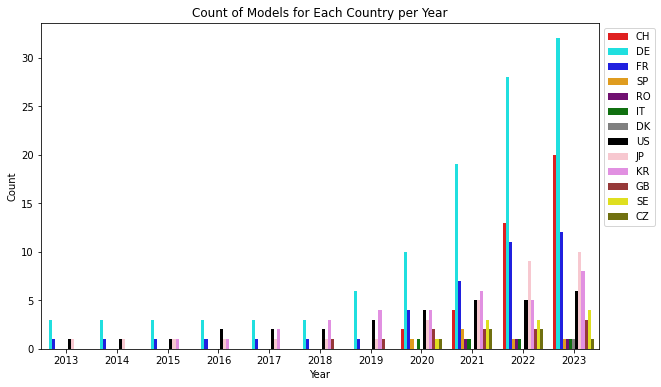

In [41]:
# Define the color mapping
color_dict = {'CH': 'red', 'US': 'black', 'DE': 'aqua', 'FR': 'blue', 'SP': 'orange', 'RO': 'purple', 'IT': 'green', 'DK': 'grey', 'JP': 'pink', 'KR': 'violet', 'GB': 'brown', 'SE': 'yellow', 'CZ': 'olive'}

plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='Country', data=data, palette=color_dict)
plt.title('Count of Models for Each Country per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()




/var/folders/84/nl1t_q050914klynvps92vkc0000gn/T/ipykernel_29229/3007061061.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Region'] = data['Country'].apply(regions)


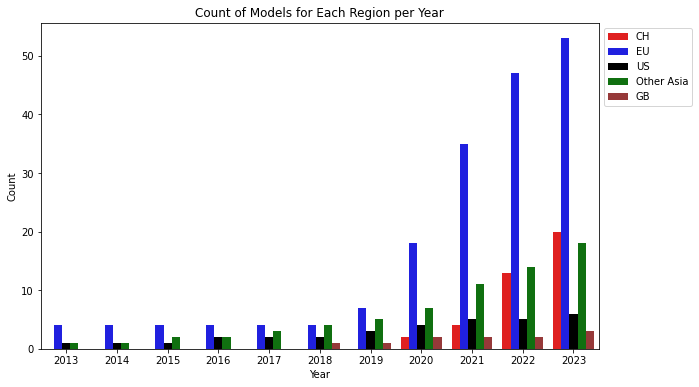

In [42]:
# Define a custom aggregation function
def regions(country):
    if country in ['DE', 'FR', 'DK', 'IT', 'RO', 'CZ', 'SP', 'SE']:
        return 'EU'
    elif country in ['JP', 'KR']:
        return 'Other Asia'
    else:
        return country

# Apply the function to the 'Country' column
data['Region'] = data['Country'].apply(regions)

# Define the color mapping
color_dict = {'CH': 'red', 'US': 'black', 'Other Asia': 'green', 'GB': 'brown', 'EU': 'blue'}

# Plot the count of models per country per year
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='Region', data=data, palette=color_dict)
plt.title('Count of Models for Each Region per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
